Evaluación del modelo de Regresión Logística
Accuracy:  0.8708
Precision: 0.8661
Recall:    0.8349
F1-Score:  0.8502

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



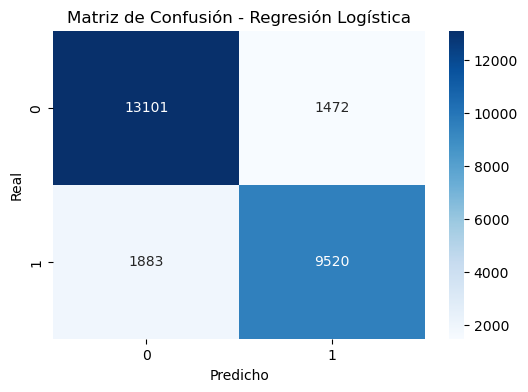

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Eliminación columna id
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

# Codificación de las variables categóricas nominales
cols_to_encode = ["Gender", "Customer Type", "Type of Travel", "Class"]

le = LabelEncoder()
for col in cols_to_encode:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Codificación de la variable objetivo
train_df["satisfaction"] = train_df["satisfaction"].map({
    "satisfied": 1, "neutral or dissatisfied": 0,
    "Satisfied": 1, "Neutral or Dissatisfied": 0
})
test_df["satisfaction"] = test_df["satisfaction"].map({
    "satisfied": 1, "neutral or dissatisfied": 0,
    "Satisfied": 1, "Neutral or Dissatisfied": 0
})

# Doublecheck valores nulos
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)

# Partición de la muestra
X_train = train_df.drop(columns=["satisfaction"])
y_train = train_df["satisfaction"]

X_test = test_df.drop(columns=["satisfaction"])
y_test = test_df["satisfaction"]

# Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluación del modelo de Regresión Logística")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()